In [ ]:
import geopandas as gpd

In [ ]:

data=gpd.read_file('/content/DEC_lands.shp')

In [ ]:
data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [ ]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [ ]:
imp_data=data.loc[:,["CLASS","COUNTY","geometry"]].copy()

In [ ]:
imp_data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [ ]:
imp_data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [ ]:
wild_lands=imp_data.loc[imp_data.CLASS.isin(['WILD FOREST','WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


<Axes: >

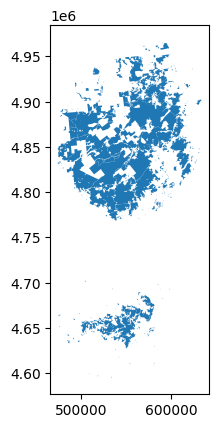

In [ ]:
wild_lands.plot()

In [ ]:
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [ ]:
#POINTS
POI_data=gpd.read_file('/content/Decptsofinterest.shp')
POI_data.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
3,3945,ALLEGANY 12,LOST NATION STATE FOREST,NEWLAND FR PARKING,UNPAVED PARKING LOT,-99,9,WEST ALMOND,None,8623,N,POINT (231909.125 4712818.500)
4,1037,CATTARAUGUS 08,ROCK CITY STATE FOREST,LRC PICNIC PAVILION #1,PICNIC PAVILION,None,9,ALLEGANY,None,14561,N,POINT (193656.734 4679632.500)


In [ ]:
#SELECTING CAMPSITES
campsites=POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()
campsites.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
5,39673,AFP,SARANAC LAKES WILD FOREST,SARANAC ISLANDS CAMPGROUND SITE 27,PRIMITIVE CAMPSITE,None,5,RAY BROOK,2012-01-09,5337,N,POINT (562996.482 4904871.885)
6,19434,AFP,LAKE GEORGE WILD FOREST,GAY POND ROAD CAMPSITE 13,PRIMITIVE CAMPSITE,DESIGNATED CAMPSITE WITH ACCESSIBLE PRIVY AND ...,5,WARRENSBURG,2010-05-24,3030,Y,POINT (591292.402 4807432.222)


In [ ]:
#LineString(Foot Trails)
road_trails=gpd.read_file('/content/Decroadstrails.shp')
road_trails.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
0,208,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1583.181399,1577.112643,"LINESTRING (511367.312 4804744.000, 511442.406..."
1,211,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,948.150638,945.366235,"LINESTRING (512806.962 4804560.806, 512796.625..."
2,212,AFP,FERRIS LAKE WILD FOREST,PARKER VLY TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,3862.887604,3853.119292,"MULTILINESTRING ((515866.032 4804650.001, 5158..."
3,229,AFP,FERRIS LAKE WILD FOREST,WAGONERS LOOP,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,10536.778083,10485.458536,"LINESTRING (533975.501 4796126.500, 533992.812..."
4,233,AFP,FERRIS LAKE WILD FOREST,SHERIFF LAKE TRAIL,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1439.438752,1432.490031,"LINESTRING (531496.700 4799892.919, 531482.375..."


In [ ]:
#SELECTING FOOT TRAILS
trails = road_trails.loc[road_trails.ASSET=='FOOT TRAIL'].copy()
trails.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
31,304,AFP,DEBAR MOUNTAIN WILD FOREST,MAIN BRANCH CANOE CARRY,FOOT TRAIL,N,M,N,N,N,...,N,None,RT,2006-08-24,5,RAY BROOK,None,244.776100,246.427662,"LINESTRING (542463.277 4933622.421, 542429.239..."
34,311,AFP,DEBAR MOUNTAIN WILD FOREST,CAMP SITE ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,163.203974,163.203974,"LINESTRING (564033.375 4922561.921, 564100.343..."
35,312,AFP,DEBAR MOUNTAIN WILD FOREST,ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,117.720119,117.720119,"LINESTRING (564202.360 4922745.700, 564298.863..."
37,314,AFP,DEBAR MOUNTAIN WILD FOREST,EAST BRANCH CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2006-08-24,5,RAY BROOK,None,386.073522,386.073522,"LINESTRING (547547.421 4942827.828, 547629.172..."
38,317,AFP,DEBAR MOUNTAIN WILD FOREST,RAINBOW LAKE TO JONES POND CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-04-19,5,RAY BROOK,None,127.460965,127.460965,"LINESTRING (564759.838 4923577.416, 564654.630..."


In [ ]:
#Polygon(County boundaries)
counties=gpd.read_file('/content/NY_county_boundaries.shp')
counties.head()

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((522686.116 4977770.435, 522785.820 4..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((576869.554 4981194.984, 576661.323 4..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((576869.554 4981194.984, 577209.259 4..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((622025.362 4932488.545, 621958.049 4..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((431513.316 4917024.860, 433126.724 4..."


<Axes: >

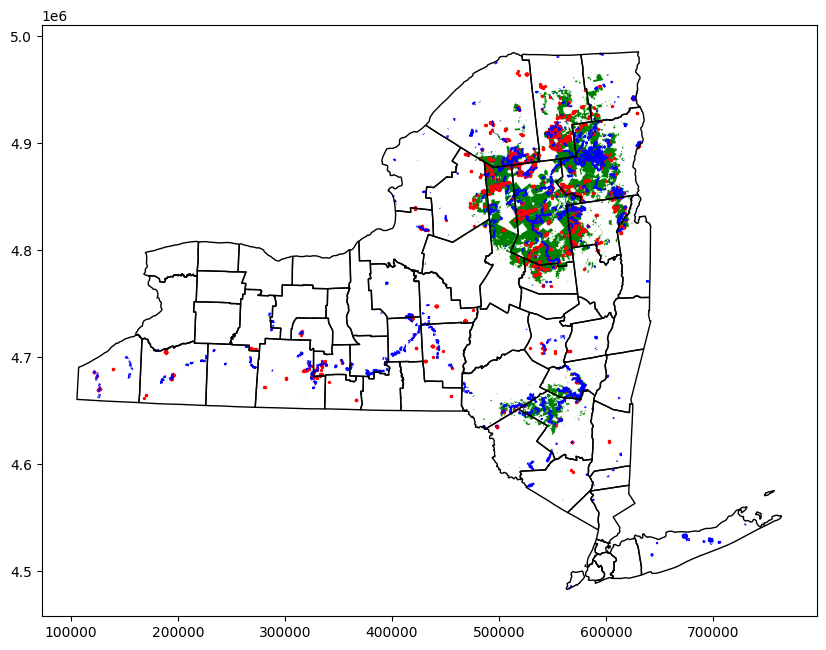

In [ ]:
#Combining together all 4 dataframes to form a map
ax=counties.plot(figsize=(10,10),color='none',edgecolor='black',zorder=3)

wild_lands.plot(color='green',ax=ax)
campsites.plot(color='red',markersize=2,ax=ax)
trails.plot(color='blue',markersize=1,ax=ax)